In [1]:
import numpy as np
import sipm.sipm as sipm
import sipm.dataset as ds
import sipm.beta as beta
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sipm.constants as const
import ROOT
from numpy.random import normal
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Welcome to JupyROOT 6.26/06


In [ ]:
# Coincidence table
# 0000 ---  ---  ---  ---  ---  ---  ---  --- 
# 1000 OOO  ---  OAO  ---  ---  ---  ---  --- 
# 0100 OOO  ---  OAO  ---  ---  ---  ---  --- 
# 0010 OOO  AOO  ---  ---  ---  ---  ---  ---
# 0001 OOO  AOO  ---  ---  ---  ---  ---  --- 
# 1100 OOO  AOO  OAO  ---  AAO  ---  ---  --- 
# 1010 OOO  AOO  OAO  OOA  ---  ---  ---  ---
# 1001 OOO  AOO  OAO  OOA  ---  ---  ---  --- 
# 0110 OOO  AOO  OAO  OOA  ---  ---  ---  ---
# 0101 OOO  AOO  OAO  OOA  ---  ---  ---  ---
# 0011 OOO  AOO  OAO  ---  AAO  ---  ---  ---
# 1110 OOO  AOO  OAO  OOA  AAO  AOA  ---  --- 
# 1101 OOO  AOO  OAO  OOA  AAO  AOA  ---  --- 
# 1011 OOO  AOO  OAO  OOA  AAO  ---  OAA  --- 
# 0111 OOO  AOO  OAO  OOA  AAO  ---  OAA  --- 
# 1111 OOO  AOO  OAO  OOA  AAO  AOA  OAA  AAA 

# List of Datasets
- Top 11/17:
    * 000, 100, 001, 110, 011

In [2]:
dir1117 = [ '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/']
coinc = ['OOO', 'AOO', 'OOA', 'AAO', 'OAA', 'AAA']

In [3]:
ds1117 = []
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
gain = [[556.758,548.693,548.862,541.270], [556.997, 503.579, 549.769, 558.519]]
for i,dir in enumerate(dir1117):
    data = ds.Dataset('', pol=-1, channels=range(4), spe=gain[0])
    for j in range(20):
        for ch in range(4):
            subdir = '{}{}/'.format(dir, j)
            print(subdir)
            data.ch[ch].path = subdir
            data.ch[ch].read_data()
            print('nevents={}'.format(data.ch[ch].nevents))
            data.ch[ch].baseline_subtraction()
            data.ch[ch].get_integral(prompt=0.5, long=5)
            data.ch[ch].clear()
    data.get_summed_integral_pe()
    ds1117.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/1/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/1/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000

nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/14/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/14/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/14/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/14/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/15/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/15/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_sci

nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/7/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/8/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/8/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/8/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/8/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_100_cond_gamma/9/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintilla

nevents=10043
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/1/
nevents=10043
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/1/
nevents=10043
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/2/
nevents=10087
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/2/
nevents=10087
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/2/
nevents=10087
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/2/
nevents=10087
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintilla

nevents=10691
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/15/
nevents=10691
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/15/
nevents=10691
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/16/
nevents=11127
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/16/
nevents=11127
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/16/
nevents=11127
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_001_cond_gamma/16/
nevents=11127
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_sci

nevents=11156
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/9/
nevents=11156
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/9/
nevents=11156
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/9/
nevents=11156
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/10/
nevents=11039
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/10/
nevents=11039
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_110_cond_gamma/10/
nevents=11039
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scinti

nevents=10733
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/3/
nevents=10768
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/3/
nevents=10768
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/3/
nevents=10768
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/3/
nevents=10768
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/4/
nevents=10822
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/4/
nevents=10822
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintilla

nevents=10678
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/17/
nevents=10644
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/17/
nevents=10644
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/17/
nevents=10644
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/17/
nevents=10644
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/18/
nevents=10723
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_011_cond_gamma/18/
nevents=10723
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_sci

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/10/
nevents=5003
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/10/
nevents=5003
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/10/
nevents=5003
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/10/
nevents=5003
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/11/
nevents=5004
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-15/2022-11-15_volt_65_pos_top_light_scintillation_coinc_111_cond_gamma_high_stat/11/
nevents=5004
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11

174324 events simulated


(0.0, 300.0)

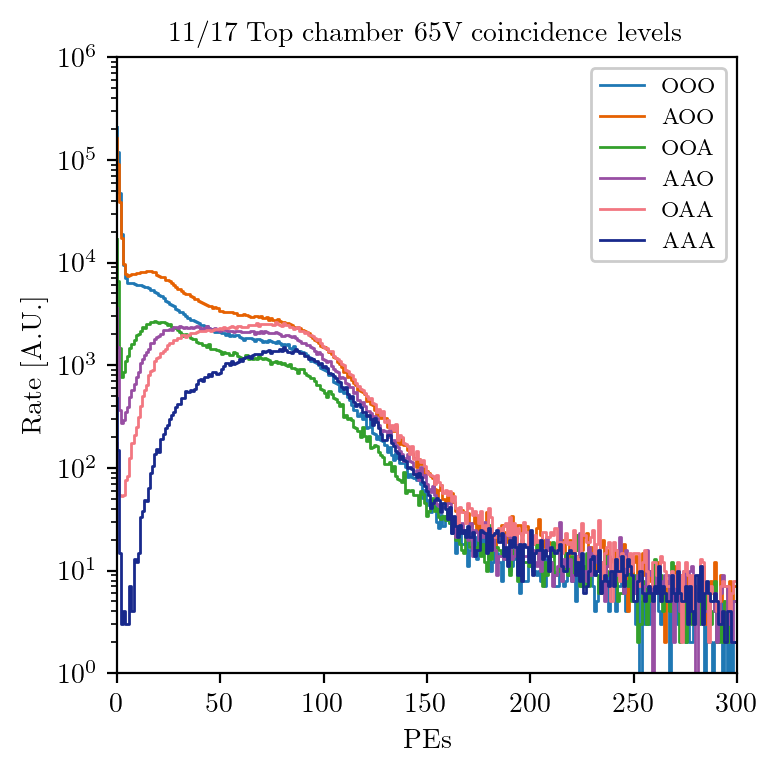

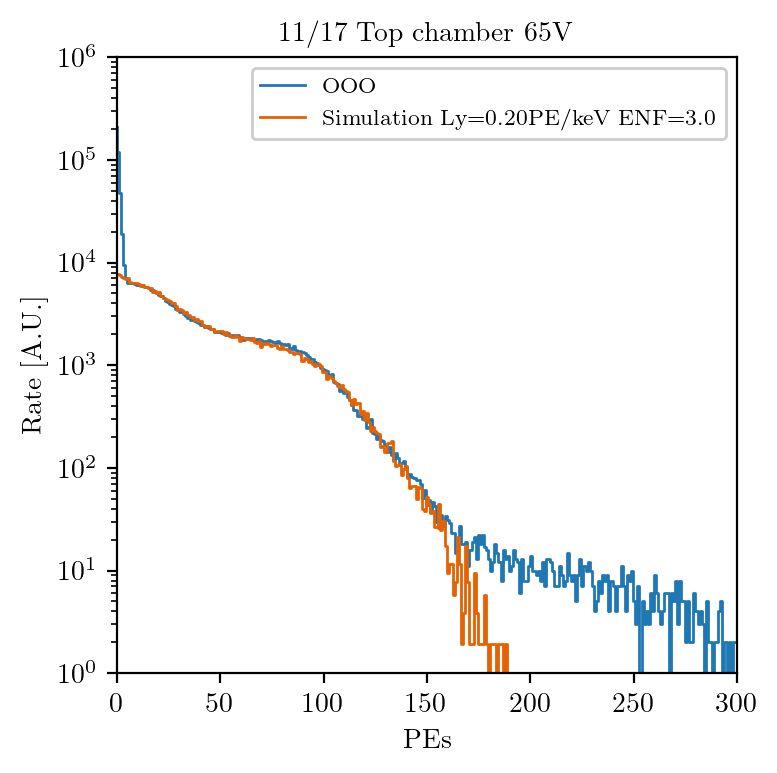

In [7]:
xmin = 0
xmax = 300
nbins = 300
bin_width = (xmax-xmin)/nbins

hist = []
hist_bins = []
plt.figure(0,figsize=(4,4))
for i,dset in enumerate(ds1117):
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
#     h = h/dset.ch[0].cumulative_time/bin_width
#     h = h/np.sum(h[int((200-xmin)/bin_width):])
    hist.append(h)
    hist_bins.append(hx)
    plt.step(hx[:-1], h, label=coinc[i], linewidth=1)
    
plt.yscale('log')
plt.ylabel('Rate [A.U.]')
plt.xlabel('PEs')
plt.legend(loc='upper right')
plt.title('11/17 Top chamber 65V coincidence levels')
plt.xlim(xmin, xmax)

plt.figure(1,figsize=(4,4))
# For the top
import ROOT
from numpy.random import normal
ly = 0.195
enf = 3.0
file = ROOT.TFile("~/sipm-analysis/jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")
simulated_pe = []
nev = 0
for i,ev in enumerate(tr):
    for j in range(1):
        simulated_pe.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
        nev += 1
print('{} events simulated'.format(nev))
i = 0 #['OOO', 'AOO', 'OOA', 'AAO', 'OAA', 'AAA']
hSimPE, hSimPE_bins = np.histogram(simulated_pe, bins=np.linspace(xmin,xmax,nbins))
hSimPE = hSimPE*np.sum(hist[0][int((20-xmin)/bin_width):int((150-xmin)/bin_width)])/np.sum(hSimPE[int((20-xmin)/bin_width):int((150-xmin)/bin_width)])
plt.step(hist_bins[i][:-1], hist[i], label=coinc[i], linewidth=1)
plt.step(hSimPE_bins[:-1], hSimPE, label='Simulation Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)
plt.yscale('log')
plt.ylabel('Rate [A.U.]')
plt.xlabel('PEs')
plt.legend(loc='upper right')
plt.title('11/17 Top chamber 65V')
plt.xlim(xmin, xmax)

# Fitting Attempt

In [20]:
def chisquare_two_hist(light_yield, enf, data_hist, data_hist_bins, data_hist_err, sim_tree, fit_range_in_pe):
    xmin = data_hist_bins[0]
    xmax = data_hist_bins[-1]
    nbins = len(data_hist_bins)
    bin_width = (xmax-xmin)/nbins
#     print(np.shape(data_hist), np.shape(data_hist_bins), np.shape(data_hist_err))
    
    simulated_pe = []
    for i,ev in enumerate(sim_tree):
        simulated_pe.append(normal(light_yield*sim_tree.Edep, np.sqrt(enf*light_yield*tr.Edep)))
    hSimPE, hSimPE_bins = np.histogram(simulated_pe, bins=np.linspace(xmin,xmax,nbins))
    hSimPE_err = np.sqrt(hSimPE)
#     print(np.shape(hSimPE), np.shape(hSimPE_bins), np.shape(hSimPE_err))
    simulated_pe = []
    fit_range_in_bin = [int((fit_range_in_pe[0]-xmin)/bin_width), int((fit_range_in_pe[1]-xmin)/bin_width)]
    norm_data = np.sum(data_hist[fit_range_in_bin[0]:fit_range_in_bin[1]])
    data_hist = data_hist/norm_data
    data_hist_err = data_hist_err/norm_data
    norm_sim = np.sum(hSimPE[fit_range_in_bin[0]:fit_range_in_bin[1]])
    hSimPE = hSimPE/norm_sim
    hSimPE_err = hSimPE_err/norm_sim
    chi_square = 0
    for i in range(fit_range_in_bin[0], fit_range_in_bin[1]):
        chi_square += (data_hist[i] - hSimPE[i])**2/((data_hist_err[i])**2 + (hSimPE_err[i])**2)
    dof = fit_range_in_pe[1]-fit_range_in_pe[0] - 3
    print(light_yield, enf, chi_square)
    return chi_square

In [3]:
dir1117 = [ '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_no_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/',
            '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_no_gamma/']
labels = ['top', 'top bkg', 'bottom', 'bottom bkg']

In [4]:
ds1117 = []
# gain = [[T0,T1,T2,T3],[B0,B1,B2,B3]]
gain = [[556.758,548.693,548.862,541.270], [556.997, 503.579, 549.769, 558.519]]
for i,dir in enumerate(dir1117):
    data = ds.Dataset('', pol=-1, channels=range(4), spe=gain[i//2])
    for j in range(5):
        for ch in range(4):
            subdir = '{}{}/'.format(dir, j)
            print(subdir)
            data.ch[ch].path = subdir
            data.ch[ch].read_data()
            print('nevents={}'.format(data.ch[ch].nevents))
            data.ch[ch].baseline_subtraction()
            data.ch[ch].get_integral(prompt=0.5, long=5)
            data.ch[ch].clear()
    data.get_summed_integral_pe()
    ds1117.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/0/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/1/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000_cond_gamma/1/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_top_light_scintillation_coinc_000

nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/3/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/4/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/4/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_bottom_light_scintillation_coinc_000_cond_gamma/4/
nevents=50000
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-17/2022-11-17_volt_65_pos_b

(0.0, 250.0)

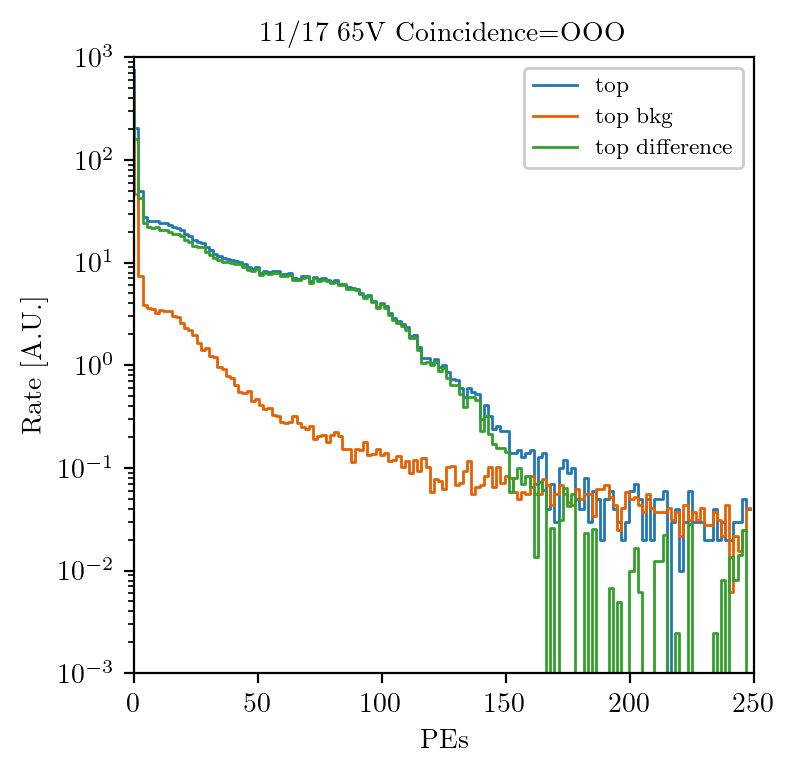

In [46]:
xmin = 0
xmax = 250
nbins = 150
bin_width = (xmax-xmin)/nbins

hist = [] #[top, top bkg, bot, bot bkg, top diff, bot diff]
hist_bins = []
hist_err = []
plt.figure(0,figsize=(4,4))
bkg_boundary = 200
for i,dset in enumerate(ds1117[:2]):
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
#     h = h/dset.ch[0].cumulative_time/bin_width
    norm_factor = np.sum(h[int((bkg_boundary-xmin)/bin_width):])
    hist_err.append(np.sqrt(h)/norm_factor)
    h = h/norm_factor
    hist.append(h)
    hist_bins.append(hx)
    plt.step(hx[:-1], h, label=labels[i], linewidth=1)
plt.step(hist_bins[0][:-1], hist[0]-hist[1], label='top difference', linewidth=1)
hist_bins.append(hist_bins[0])
hist.append(hist[0]-hist[1])
hist_err.append(np.sqrt(hist[0]**2+hist[1]**2))
plt.yscale('log')
plt.ylabel('Rate [A.U.]')
plt.xlabel('PEs')
plt.legend(loc='upper right')
plt.title('11/17 65V Coincidence=OOO')
plt.xlim(xmin, xmax)

0.18 0.5 10.911403352392078
0.1875 0.5 6.24875355099719
0.195 0.5 2.855256049808556
0.20249999999999999 0.5 1.201860743347813
0.21 0.5 3.8593485938681975
0.18 1.625 5.802867925018834
0.1875 1.625 2.480384871928733
0.195 1.625 0.47132256918383314
0.20249999999999999 1.625 1.5555307232768338
0.21 1.625 5.472533401669865
0.18 2.75 2.9399051671326117
0.1875 2.75 1.126790984085616
0.195 2.75 0.8138837899069034
0.20249999999999999 2.75 3.6184426646368184
0.21 2.75 9.739319338956141
0.18 3.875 1.3958472853178407
0.1875 3.875 0.9982365543870153
0.195 3.875 3.4640389765275006
0.20249999999999999 3.875 7.330117444234788
0.21 3.875 15.734898071690145
0.18 5.0 1.1644623824974027
0.1875 5.0 2.2416045391351167
0.195 5.0 5.236729079642822
0.20249999999999999 5.0 12.757655460783205
0.21 5.0 22.133321261908016


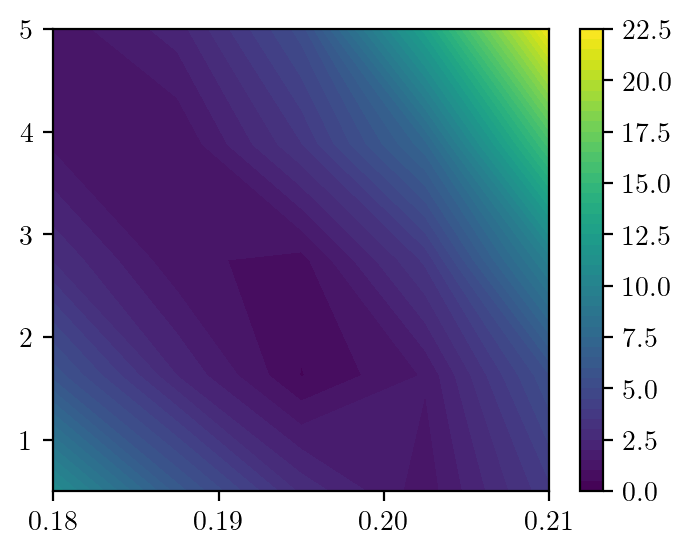

174324 events simulated


(0.01, 1000.0)

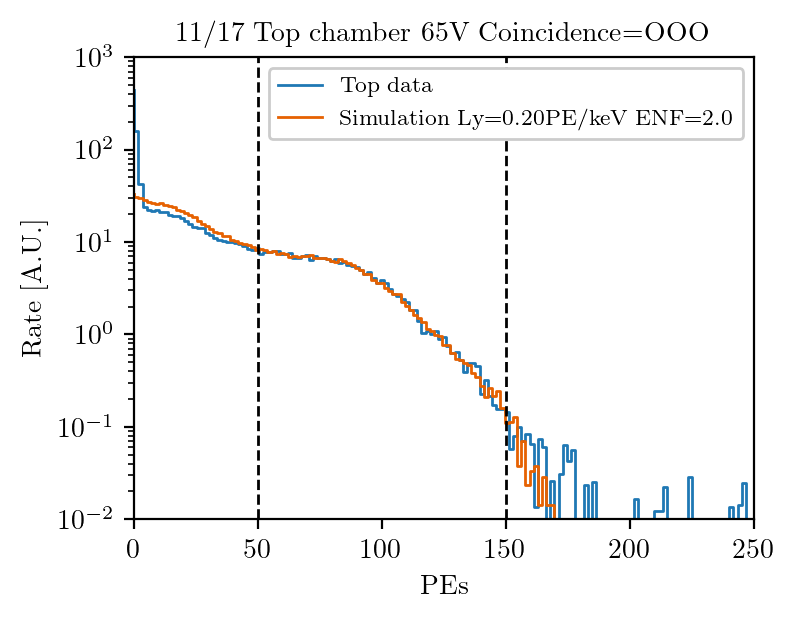

In [57]:
# TOP CHAMBER
file = ROOT.TFile("~/sipm-analysis/jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")

lys = np.linspace(0.18, 0.21, 5)
enfs = np.linspace(0.5, 5, 5)
X,Y = np.meshgrid(lys, enfs)
fig,ax=plt.subplots(1,1)

norm_min = 50
norm_max = 150
cp=ax.contourf(X, Y, np.array([[chisquare_two_hist(ly_, enf_, hist[2], hist_bins[2], hist_err[2], tr, [norm_min,norm_max]) for ly_ in lys] for enf_ in enfs]), 50)
# cp=ax.contourf(X,Y,np.sqrt(X**2+Y**2))
fig.colorbar(cp) # Add a colorbar to a plot
plt.show()

ly = 0.195
enf = 2.0
simPE = []
nev = 0
for i,ev in enumerate(tr):
    for j in range(1):
        simPE.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
        nev += 1
print('{} events simulated'.format(nev))
file.Close()

ymin = 1e-2
ymax = 1e3
hSimTop, hSimTop_bins = np.histogram(simPE, bins=np.linspace(xmin,xmax,nbins))
hSimTop = hSimTop*np.sum(hist[2][int((norm_min-xmin)/bin_width):int((norm_max-xmin)/bin_width)])/np.sum(hSimTop[int((norm_min-xmin)/bin_width):int((norm_max-xmin)/bin_width)])
plt.step(hist_bins[2][:-1], hist[2], label='Top data', linewidth=1)
plt.step(hSimTop_bins[:-1], hSimTop, label='Simulation Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)
plt.plot([norm_min, norm_min], [ymin, ymax], 'k--', linewidth=1)
plt.plot([norm_max, norm_max], [ymin, ymax], 'k--', linewidth=1)
plt.yscale('log')
plt.ylabel('Rate [A.U.]')
plt.xlabel('PEs')
plt.legend(loc='upper right')
plt.title('11/17 Top chamber 65V Coincidence=OOO')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

(0.0, 1200.0)

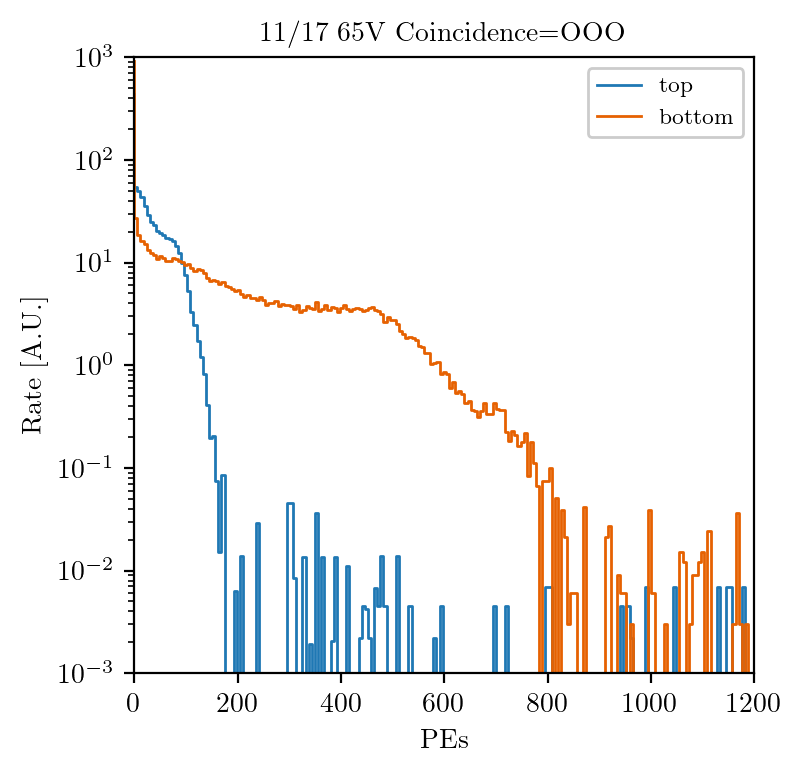

In [58]:
xmin = 0
xmax = 1200
nbins = 200
bin_width = (xmax-xmin)/nbins

hist = [] #[top, top bkg, bot, bot bkg, top diff, bot diff]
hist_bins = []
hist_err = []
plt.figure(0,figsize=(4,4))
bkg_boundary = [250, 250, 1000, 1000]
for i,dset in enumerate(ds1117):
    h,hx = np.histogram(dset.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
#     h = h/dset.ch[0].cumulative_time/bin_width
    norm_factor = np.sum(h[int((bkg_boundary[i]-xmin)/bin_width):])
    h = h/norm_factor
    hist.append(h)
    hist_bins.append(hx)
    hist_err.append(np.sqrt(h)/norm_factor)
#     plt.step(hx[:-1], h, label=labels[i], linewidth=1)
    
plt.step(hist_bins[0][:-1], hist[0]-hist[1], label='top', linewidth=1)
hist_bins.append(hist_bins[0])
hist.append(hist[0]-hist[1])
hist_err.append(np.sqrt(hist[0]**2 + hist[1]**2))
plt.step(hist_bins[2][:-1], hist[2]-hist[3], label='bottom', linewidth=1)
hist_bins.append(hist_bins[2])
hist.append(hist[2]-hist[3])
hist_err.append(np.sqrt(hist[2]**2 + hist[3]**2))
plt.yscale('log')
plt.ylabel('Rate [A.U.]')
plt.xlabel('PEs')
plt.legend(loc='upper right')
plt.title('11/17 65V Coincidence=OOO')
plt.xlim(xmin, xmax)

1.0 1.0 11.783736907546993
1.025 1.0 8.871095179328595
1.05 1.0 5.669849783865379
1.0750000000000002 1.0 4.140740759832866
1.1 1.0 5.462134775147347
1.0 3.25 6.900884795415045
1.025 3.25 4.050148881917539
1.05 3.25 1.7417875485551826
1.0750000000000002 3.25 1.6044096645929873
1.1 3.25 5.035929679671822
1.0 5.5 4.836727026171609
1.025 5.5 2.4847008939495185
1.05 5.5 1.5666724466051172
1.0750000000000002 5.5 2.759708197705846
1.1 5.5 6.414283731687032
1.0 7.75 3.4935603729199367
1.025 7.75 2.4535577806640507
1.05 7.75 2.583763658852739
1.0750000000000002 7.75 5.104430624466381
1.1 7.75 9.032992921082258
1.0 10.0 3.0220189872421157
1.025 10.0 2.6252742123845607
1.05 10.0 3.4463504460054186
1.0750000000000002 10.0 5.806725245522044
1.1 10.0 9.798788902529045


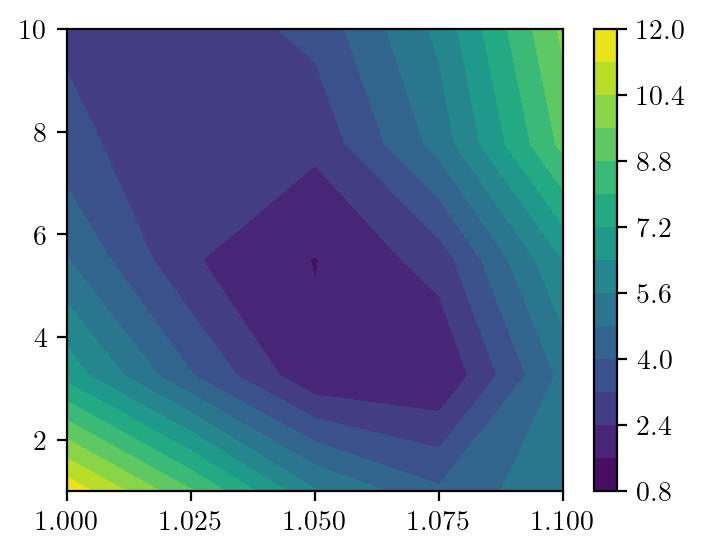

174324 events simulated


(0.01, 1000.0)

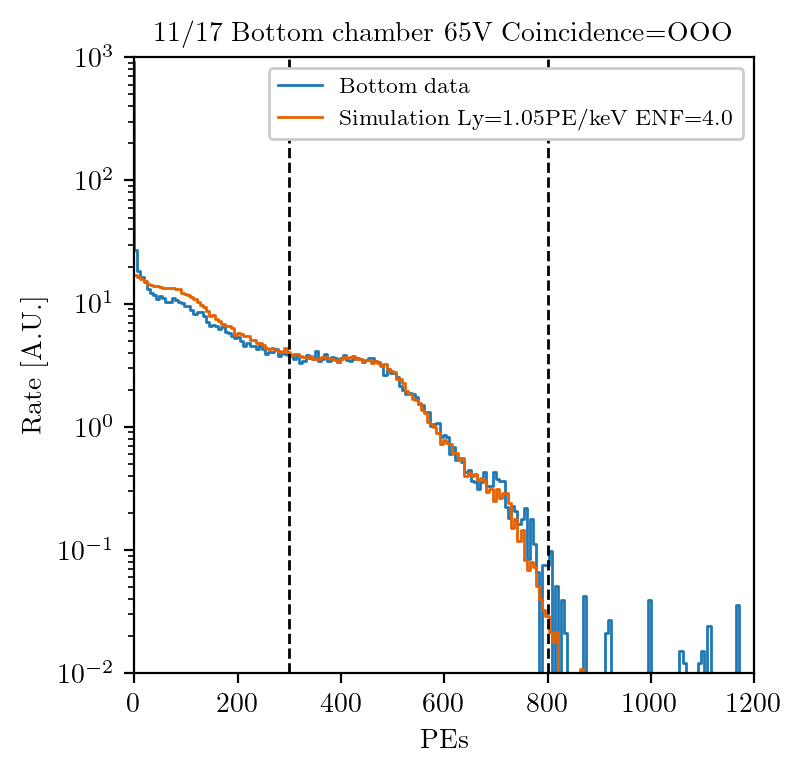

In [61]:
# BOTTOM CHAMBER
lys = np.linspace(1.00, 1.1, 5)
enfs = np.linspace(1, 10, 5)
X,Y = np.meshgrid(lys, enfs)
fig,ax=plt.subplots(1,1)
file = ROOT.TFile("~/sipm-analysis/jupyter/pu_lar_cs137_Edep.root", "read")
tr = file.Get("trEdep")

norm_min = 300
norm_max = 800
cp=ax.contourf(X, Y, np.array([[chisquare_two_hist(ly_, enf_, hist[5], hist_bins[5], hist_err[5], tr, [norm_min,norm_max]) for ly_ in lys] for enf_ in enfs]), 15)
# cp=ax.contourf(X,Y,np.sqrt(X**2+Y**2))
fig.colorbar(cp) # Add a colorbar to a plot
plt.show()

# Plot spectrum
plt.figure(1,figsize=(4,4))
ly = 1.05
enf = 4.
simPE = []
nev = 0
for i,ev in enumerate(tr):
    for j in range(1):
        simPE.append(normal(ly*tr.Edep, np.sqrt(enf*ly*tr.Edep)))
        nev += 1
print('{} events simulated'.format(nev))

ymin = 1e-2
ymax = 1e3
hSimBot, hSimBot_bins = np.histogram(simPE, bins=np.linspace(xmin,xmax,nbins))
hSimBot = hSimBot*np.sum(hist[5][int((norm_min-xmin)/bin_width):int((norm_max-xmin)/bin_width)])/np.sum(hSimBot[int((norm_min-xmin)/bin_width):int((norm_max-xmin)/bin_width)])
plt.step(hist_bins[5][:-1], hist[5], label='Bottom data', linewidth=1)
plt.step(hSimBot_bins[:-1], hSimBot, label='Simulation Ly={:.2f}PE/keV ENF={:.1f}'.format(ly, enf), linewidth=1)
plt.plot([norm_min, norm_min], [ymin, ymax], 'k--', linewidth=1)
plt.plot([norm_max, norm_max], [ymin, ymax], 'k--', linewidth=1)
plt.yscale('log')
plt.ylabel('Rate [A.U.]')
plt.xlabel('PEs')
plt.legend(loc='upper right')
plt.title('11/17 Bottom chamber 65V Coincidence=OOO')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)